In [19]:
import pandas as pd
import os

# 📁 엑셀 파일이 있는 폴더 경로
folder_path = "새 폴더"  # 실제 경로로 바꾸세요

# 📂 엑셀 파일 목록 수집
file_list = [f for f in os.listdir(folder_path) if f.endswith('.xlsx')]

# 🧹 파일 병합
merged_data = []

for file_name in file_list:
    file_path = os.path.join(folder_path, file_name)
    df = pd.read_excel(file_path, sheet_name=0)

    # '정산일자'가 있는 행 찾기
    start_idx = df[df.iloc[:, 0] == "정산일자"].index
    if len(start_idx) == 0:
        continue
    start_idx = start_idx[0]

    # 컬럼 지정 및 데이터 추출
    df.columns = df.iloc[start_idx]
    df = df.iloc[start_idx + 1:].reset_index(drop=True)

    # 필요한 열만 선택
    df["파일명"] = file_name
    df = df[["정산일자", "총 매출금액", "총 주문건수", "파일명"]]

    merged_data.append(df)

# 📊 전체 병합
final_df = pd.concat(merged_data, ignore_index=True)

# 💾 CSV 파일로 저장
final_df.to_csv("df.csv", index=False, encoding='utf-8-sig')


In [1]:
!pip install openpyxl


In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rc
from matplotlib import font_manager as fm
plt.rc('font', family='Malgun')
sns.set(font="Malgun Gothic",
rc={"axes.unicode_minus":False}, # 마이너스 부호 깨짐 현상 해결
style='darkgrid')

In [2]:
import sys
!{sys.executable} -m pip install openpyxl

In [2]:
import pandas as pd
import numpy as np

## 전처리

In [4]:
df = pd.read_csv("df.csv")
df.head()

,정산일자,총 매출금액,총 주문건수,파일명
0,23-01-01,1300700,48,[2023-01] 월간 정산.xlsx
1,23-01-02,0,0,[2023-01] 월간 정산.xlsx
2,23-01-03,865000,29,[2023-01] 월간 정산.xlsx
3,23-01-04,892600,34,[2023-01] 월간 정산.xlsx
4,23-01-05,975400,35,[2023-01] 월간 정산.xlsx


In [5]:
df.drop(columns= ["파일명"], inplace=True)
df

,정산일자,총 매출금액,총 주문건수
0,23-01-01,1300700,48
1,23-01-02,0,0
2,23-01-03,865000,29
3,23-01-04,892600,34
4,23-01-05,975400,35
...,...,...,...
874,25-04-27,0,0
875,25-04-28,0,0
876,25-04-29,0,0
877,25-04-30,0,0


In [6]:
df = df[df["정산일자"] != "합계"]
df = df[df['총 주문건수'] != 0]
df.head()

,정산일자,총 매출금액,총 주문건수
0,23-01-01,1300700,48
2,23-01-03,865000,29
3,23-01-04,892600,34
4,23-01-05,975400,35
5,23-01-06,1149200,40


In [7]:
# 정산일자를 datetime 타입으로 변환
df['정산일자'] = pd.to_datetime(df['정산일자'], format='%y-%m-%d')

# 연, 월, 일 컬럼 추가
df['년'] = df['정산일자'].dt.year
df['월'] = df['정산일자'].dt.month
df['일'] = df['정산일자'].dt.day


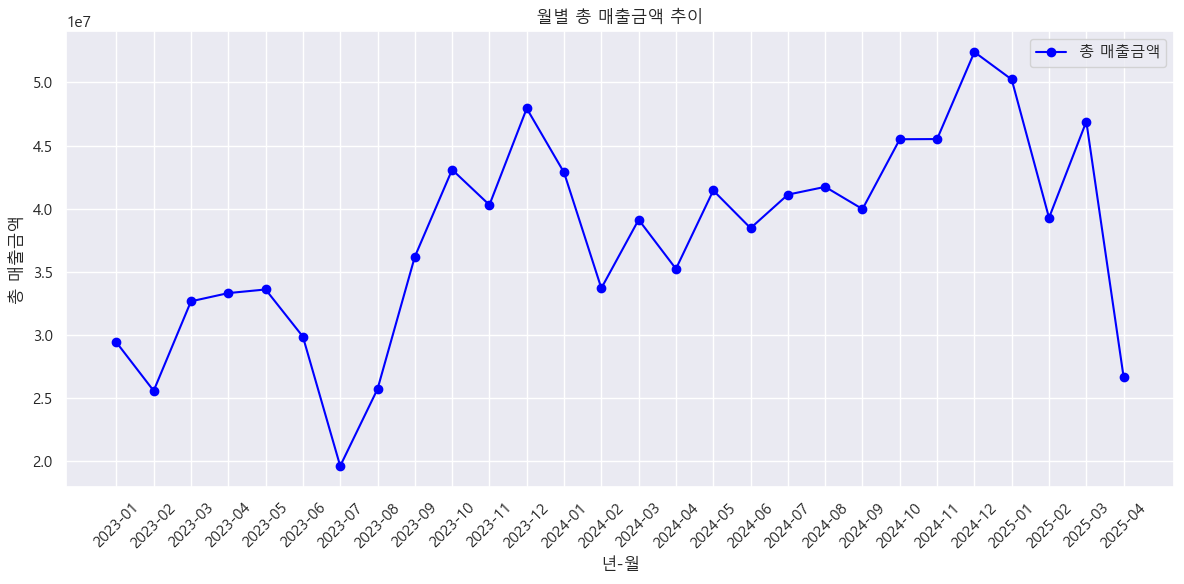

In [8]:
# 정산일자가 datetime 형식이어야 함
df['정산일자'] = pd.to_datetime(df['정산일자'])

# "년-월" 형식의 문자열 컬럼 추가
df['년월'] = df['정산일자'].dt.to_period('M').astype(str)
# 월별 총 매출금액 합계 구하기
월별_매출 = df.groupby('년월')['총 매출금액'].sum().reset_index()

import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(월별_매출['년월'], 월별_매출['총 매출금액'], marker='o', color='blue', label='총 매출금액')

plt.title('월별 총 매출금액 추이')
plt.xlabel('년-월')
plt.ylabel('총 매출금액')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


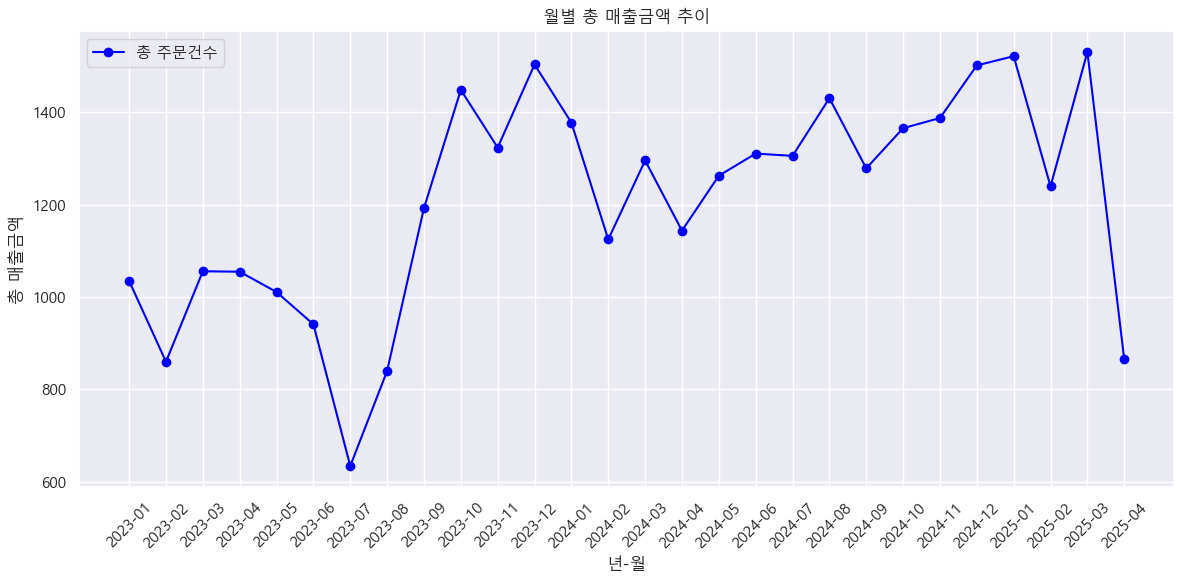

In [9]:

# 월별 총 매출금액 합계 구하기
월별_주문건수 = df.groupby('년월')['총 주문건수'].sum().reset_index()

import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(월별_주문건수['년월'], 월별_주문건수['총 주문건수'], marker='o', color='blue', label='총 주문건수')

plt.title('월별 총 매출금액 추이')
plt.xlabel('년-월')
plt.ylabel('총 매출금액')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


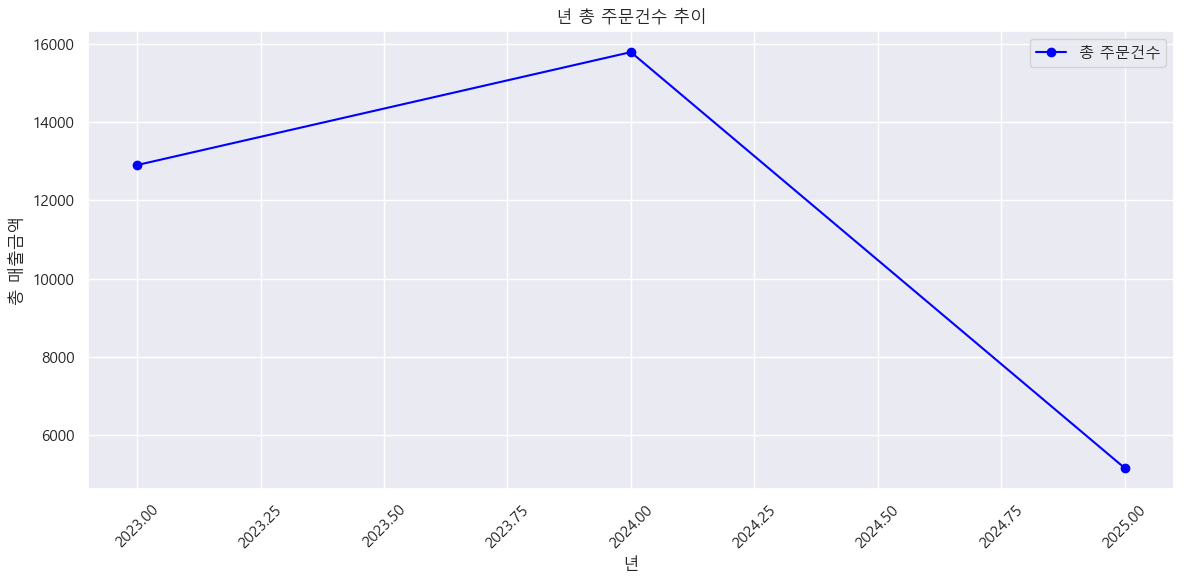

In [10]:

# 월별 총 매출금액 합계 구하기
년_주문건수 = df.groupby('년')['총 주문건수'].sum().reset_index()

import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(년_주문건수['년'], 년_주문건수['총 주문건수'], marker='o', color='blue', label='총 주문건수')

plt.title('년 총 주문건수 추이')
plt.xlabel('년')
plt.ylabel('총 매출금액')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


In [11]:
날씨 = pd.read_csv("날씨.csv", encoding='euc-kr')
강수량 = pd.read_csv("풍속.csv", encoding='euc-kr')
풍속 = pd.read_csv("강수량.csv", encoding='euc-kr')
holiday = pd.read_csv("holiday.csv")

In [12]:
df.head()

,정산일자,총 매출금액,총 주문건수,년,월,일,년월
0,2023-01-01,1300700,48,2023,1,1,2023-01
2,2023-01-03,865000,29,2023,1,3,2023-01
3,2023-01-04,892600,34,2023,1,4,2023-01
4,2023-01-05,975400,35,2023,1,5,2023-01
5,2023-01-06,1149200,40,2023,1,6,2023-01


In [13]:
df.rename(columns = {"정산일자" : "일시"}, inplace=True)

In [14]:
df['일시'] = pd.to_datetime(df['일시'])
날씨['일시'] = pd.to_datetime(날씨['일시'])
강수량['일시'] = pd.to_datetime(날씨['일시'])
풍속['일시'] = pd.to_datetime(날씨['일시'])
holiday["일시"] = pd.to_datetime(holiday['일시'])

df1 = pd.merge(df, 날씨, how='left', on='일시')
df1 = pd.merge(df1,강수량, how='left', on='일시')
df1 = pd.merge(df1,풍속, how='left', on='일시')
df1 = pd.merge(df1, holiday, how='left', on='일시')

In [15]:
df1.isnull().sum()

일시             0
총 매출금액         0
총 주문건수         0
년              0
월              0
일              0
년월             0
평균기온(℃)        2
평균풍속(m/s)      1
강수량(mm)      407
holiday      698
dtype: int64

In [16]:
df1["평균기온(℃)"] = df1["평균기온(℃)"].interpolate(method='linear')
df1["평균풍속(m/s)"] = df1["평균풍속(m/s)"].interpolate(method='linear')
df1["강수량(mm)"] = df1["강수량(mm)"].fillna(0)
df1["holiday"] = df1["holiday"].fillna(0)

In [17]:
df1.isna().sum()

일시           0
총 매출금액       0
총 주문건수       0
년            0
월            0
일            0
년월           0
평균기온(℃)      0
평균풍속(m/s)    0
강수량(mm)      0
holiday      0
dtype: int64

In [18]:
correlation_matrix = df1.select_dtypes(include=['number']).corr()
correlation_matrix

,총 매출금액,총 주문건수,년,월,일,평균기온(℃),평균풍속(m/s),강수량(mm),holiday
총 매출금액,1.000000,0.905330,0.295368,0.207246,0.048269,-0.140338,0.090731,-0.017981,0.063541
총 주문건수,0.905330,1.000000,0.259044,0.162549,0.028492,-0.108072,0.076496,-0.002107,0.084288
년,0.295368,0.259044,1.000000,-0.285150,-0.031776,-0.227729,0.098207,-0.070401,-0.010748
월,0.207246,0.162549,-0.285150,1.000000,0.016791,0.340789,-0.176663,0.037964,0.010727
일,0.048269,0.028492,-0.031776,0.016791,1.000000,0.008380,0.029757,0.005969,-0.121022
평균기온(℃),-0.140338,-0.108072,-0.227729,0.340789,0.008380,1.000000,-0.461626,0.221322,-0.023689
평균풍속(m/s),0.090731,0.076496,0.098207,-0.176663,0.029757,-0.461626,1.000000,-0.056219,-0.051966
강수량(mm),-0.017981,-0.002107,-0.070401,0.037964,0.005969,0.221322,-0.056219,1.000000,0.140467
holiday,0.063541,0.084288,-0.010748,0.010727,-0.121022,-0.023689,-0.051966,0.140467,1.000000


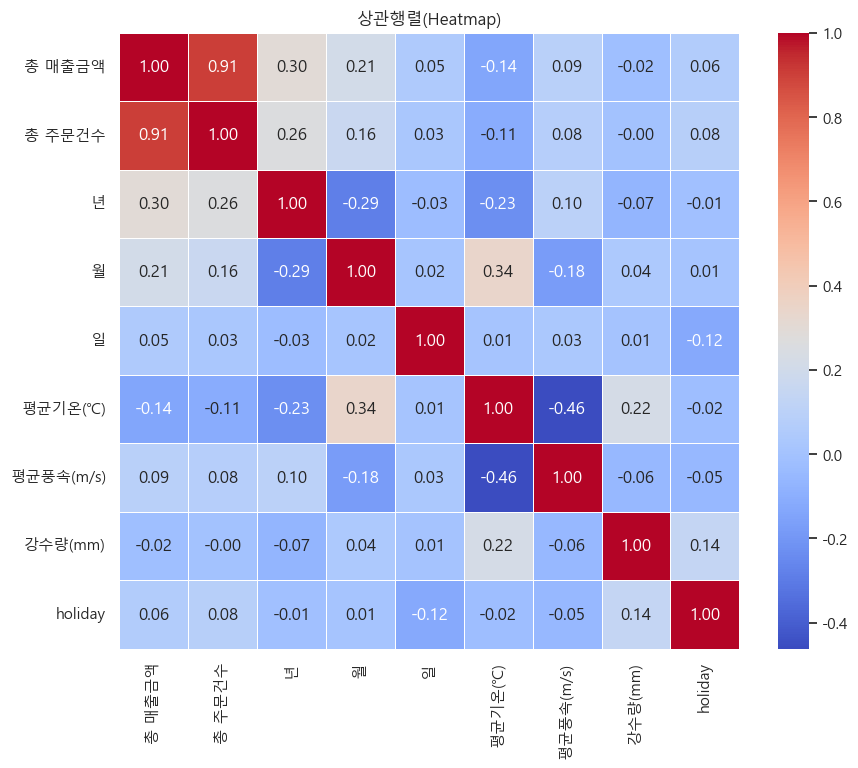

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# 상관계수 행렬 계산
correlation_matrix = df1.select_dtypes(include=['number']).corr()

# 히트맵 시각화
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('상관행렬(Heatmap)')
plt.show()


    avg_order_count     avg_sales
요일                               
0         38.509091  1.216722e+06
1         46.794872  1.491523e+06
2         40.750000  1.339442e+06
3         36.038961  1.177552e+06
4         46.743363  1.455779e+06
5         55.818966  1.683416e+06
6         61.577586  1.828753e+06


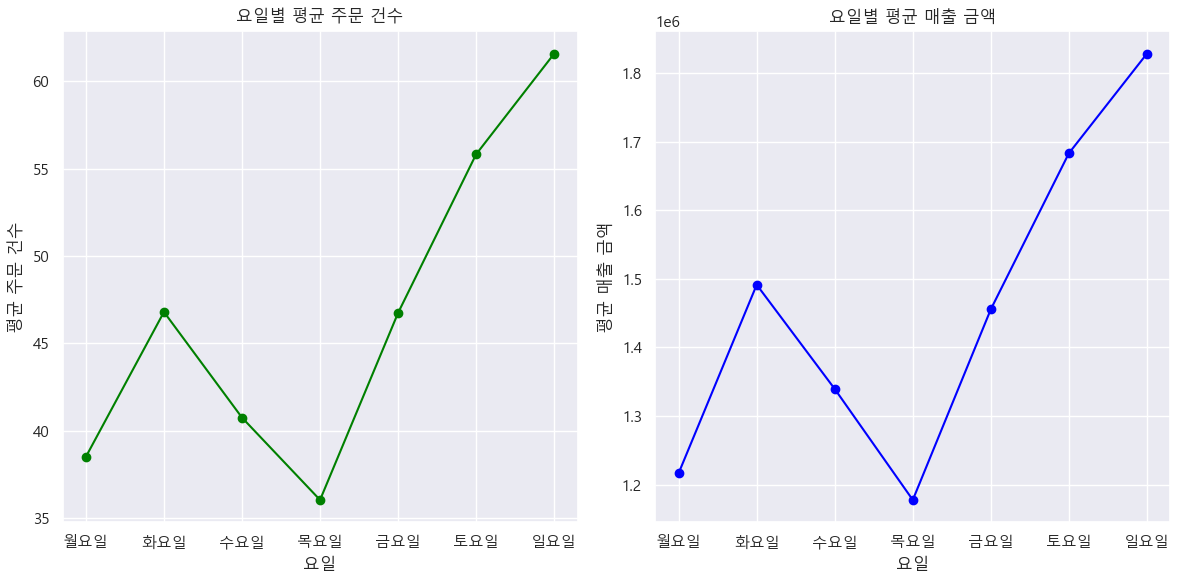

In [20]:
import matplotlib.pyplot as plt
import pandas as pd

# '일시'를 날짜 형식으로 변환
df['일시'] = pd.to_datetime(df['일시'])

# 요일 추출 (0=월요일, 1=화요일, ..., 6=일요일)
df['요일'] = df['일시'].dt.weekday

filtered_df = df[(df['총 주문건수'] > 5)]  # 주문건수가 5 이상인 날짜만 포함

# 각 요일별로 평균 주문건수와 매출을 계산
daily_avg_sales = filtered_df.groupby('요일').agg(
    avg_order_count=('총 주문건수', 'mean'),
    avg_sales=('총 매출금액', 'mean')
)

# 결과 출력
print(daily_avg_sales)

# 시각화
plt.figure(figsize=(12, 6))

# 평균 주문 건수 시각화
plt.subplot(1, 2, 1)
plt.plot(daily_avg_sales.index, daily_avg_sales['avg_order_count'], label='평균 주문 건수', color='green', marker='o')
plt.xlabel('요일')
plt.ylabel('평균 주문 건수')
plt.title('요일별 평균 주문 건수')
plt.xticks([0, 1, 2, 3, 4, 5, 6], ['월요일', '화요일', '수요일', '목요일', '금요일', '토요일', '일요일'])
plt.grid(True)

# 평균 매출 시각화
plt.subplot(1, 2, 2)
plt.plot(daily_avg_sales.index, daily_avg_sales['avg_sales'], label='평균 매출 금액', color='blue', marker='o')
plt.xlabel('요일')
plt.ylabel('평균 매출 금액')
plt.title('요일별 평균 매출 금액')
plt.xticks([0, 1, 2, 3, 4, 5, 6], ['월요일', '화요일', '수요일', '목요일', '금요일', '토요일', '일요일'])
plt.grid(True)

plt.tight_layout()
plt.show()


In [21]:
df1.head()

,일시,총 매출금액,총 주문건수,년,월,일,년월,평균기온(℃),평균풍속(m/s),강수량(mm),holiday
0,2023-01-01,1300700,48,2023,1,1,2023-01,1.1,2.9,0.0,1.0
1,2023-01-03,865000,29,2023,1,3,2023-01,-0.8,4.4,0.0,0.0
2,2023-01-04,892600,34,2023,1,4,2023-01,-0.4,2.4,0.0,0.0
3,2023-01-05,975400,35,2023,1,5,2023-01,0.2,0.9,0.0,0.0
4,2023-01-06,1149200,40,2023,1,6,2023-01,1.8,1.1,1.7,0.0


In [22]:
df.head()

,일시,총 매출금액,총 주문건수,년,월,일,년월,요일
0,2023-01-01,1300700,48,2023,1,1,2023-01,6
2,2023-01-03,865000,29,2023,1,3,2023-01,1
3,2023-01-04,892600,34,2023,1,4,2023-01,2
4,2023-01-05,975400,35,2023,1,5,2023-01,3
5,2023-01-06,1149200,40,2023,1,6,2023-01,4


In [23]:
answer = df[(df['요일'] == 0) & (df["총 주문건수"] >= 5)]
print(len(answer))

55


In [24]:
answer1 = df[(df['요일'] == 3) & (df["총 주문건수"] >= 5)]
print(len(answer1))

77


In [25]:
import scipy.stats as stats

# 월요일과 목요일에 대한 데이터 필터링
answer = df[(df['요일'] == 0) & (df["총 주문건수"] >= 5)]
answer1 = df[(df['요일'] == 3) & (df["총 주문건수"] >= 5)]

# 각각의 평균 주문 건수 계산
mean_monday = answer['총 주문건수'].mean()
mean_thursday = answer1['총 주문건수'].mean()

print(f"월요일 평균 주문 건수: {mean_monday}")
print(f"목요일 평균 주문 건수: {mean_thursday}")

# 독립 샘플 t-검정
t_stat, p_value = stats.ttest_ind(answer['총 주문건수'], answer1['총 주문건수'])

# 결과 출력
print(f"t-검정 통계량: {t_stat}")
print(f"p-값: {p_value}")

# p-값을 통해 결론 도출
if p_value < 0.05:
    print("귀무가설을 기각합니다. 즉, 월요일과 목요일의 평균 주문 건수에는 유의미한 차이가 있습니다.")
else:
    print("귀무가설을 채택합니다. 즉, 월요일과 목요일의 평균 주문 건수에는 유의미한 차이가 없습니다.")


월요일 평균 주문 건수: 38.50909090909091
목요일 평균 주문 건수: 36.03896103896104
t-검정 통계량: 1.1324257026002043
p-값: 0.2595398849610642
귀무가설을 채택합니다. 즉, 월요일과 목요일의 평균 주문 건수에는 유의미한 차이가 없습니다.


In [38]:
df_holiday = df1.groupby("holiday").mean(numeric_only=True)
df_holiday = df_holiday.reset_index()
df_holiday

,holiday,총 매출금액,총 주문건수,년,월,일,평균기온(℃),평균풍속(m/s),강수량(mm)
0,0.0,1.471738e+06,47.061605,2023.713467,5.922636,15.704871,12.117407,1.836103,4.431948
1,1.0,1.668844e+06,55.555556,2023.666667,6.166667,9.000000,10.727778,1.488889,19.183333


<Axes: xlabel='holiday', ylabel='총 주문건수'>

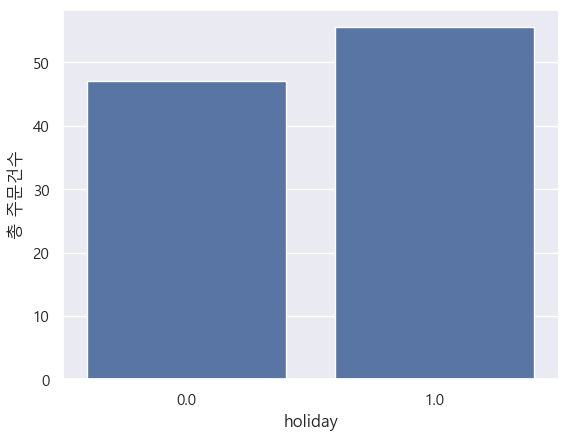

In [44]:
sns.barplot(df_holiday, x='holiday' , y='총 주문건수')


In [111]:
pip install fsspec


Note: you may need to restart the kernel to use updated packages.


In [113]:
pip conda install fsspec


Note: you may need to restart the kernel to use updated packages.


ERROR: unknown command "conda"



In [127]:
import pandas as pd

# 다른 인코딩을 사용하여 파일 읽기
df2 = pd.read_csv('C://Users//USER//Desktop//피나치공//df2.csv', encoding='ISO-8859-1')  # 또는 'cp949' 사용

# 첫 5행 출력
df2.head()


,ï¿½Ï½ï¿½,ï¿½ï¿½ï¿½ï¿½Ç¹ï¿½ï¿½ï¿½,ï¿½ï¿½ï¿½ï¿½,ï¿½ï¿½È­,ï¿½ï¿½Å¸,ï¿½ï¿½ï¿½1,ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½
0,23-Jan,770,150.0,95,20,NaN,NaN
1,23-Feb,643,114.0,86,17,NaN,NaN
2,23-Mar,808,124.0,113,11,NaN,NaN
3,23-Apr,748,142.0,112,15,38.0,NaN
4,23-May,694,138.0,119,15,45.0,NaN


In [132]:
df2.columns

Index(['일시', '배달의민족', '요기요', '전화', '기타', '배민1', '쿠팡이츠'], dtype='object')

In [131]:
df2 = pd.read_csv('C:/Users/USER/Desktop/피나치공/df2.csv', encoding='ISO-8859-1')
df2.rename(columns = {'ï¿½Ï½ï¿½':"일시",
'ï¿½ï¿½ï¿½ï¿½Ç¹ï¿½ï¿½ï¿½' : "배달의민족",
'ï¿½ï¿½ï¿½ï¿½':"요기요",
'ï¿½ï¿½È­': "전화",
'ï¿½ï¿½Å¸': "기타",
'ï¿½ï¿½ï¿½1':"배민1",
'ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½':"쿠팡이츠"},inplace=True)

In [133]:

df2['일시'] = pd.to_datetime(df2['일시'], format='%y-%b')  # "%y-%b" 포맷
df2['년월'] = df2['일시'].dt.strftime('%Y-%m')  # '년-월' 형태로 변환
df2['년월'] = df2['일시'].dt.strftime('%Y-%m')
df2.head()

,일시,배달의민족,요기요,전화,기타,배민1,쿠팡이츠,년월
0,2023-01-01,770,150.0,95,20,NaN,NaN,2023-01
1,2023-02-01,643,114.0,86,17,NaN,NaN,2023-02
2,2023-03-01,808,124.0,113,11,NaN,NaN,2023-03
3,2023-04-01,748,142.0,112,15,38.0,NaN,2023-04
4,2023-05-01,694,138.0,119,15,45.0,NaN,2023-05


In [139]:
df2.to_csv("df3.csv", index=False, encoding='utf-8-sig')

In [140]:
df3 = pd.read_csv("C:/Users/USER/Desktop/피나치공/df3.csv")
df3.head()

,일시,배달의민족,요기요,전화,기타,배민1,쿠팡이츠,년월
0,2023-01-01,770,150.0,95,20,NaN,NaN,2023-01
1,2023-02-01,643,114.0,86,17,NaN,NaN,2023-02
2,2023-03-01,808,124.0,113,11,NaN,NaN,2023-03
3,2023-04-01,748,142.0,112,15,38.0,NaN,2023-04
4,2023-05-01,694,138.0,119,15,45.0,NaN,2023-05


In [141]:
df1.head()

,일시,총 매출금액,총 주문건수,년,월,일,년월,평균기온(℃),평균풍속(m/s),강수량(mm),holiday
0,2023-01-01,1300700,48,2023,1,1,2023-01,1.1,2.9,0.0,1.0
1,2023-01-03,865000,29,2023,1,3,2023-01,-0.8,4.4,0.0,0.0
2,2023-01-04,892600,34,2023,1,4,2023-01,-0.4,2.4,0.0,0.0
3,2023-01-05,975400,35,2023,1,5,2023-01,0.2,0.9,0.0,0.0
4,2023-01-06,1149200,40,2023,1,6,2023-01,1.8,1.1,1.7,0.0


In [149]:
df3['일시'] = pd.to_datetime(df3['일시'], format='%Y-%m-%d')
df3['년월'] = df3['일시'].dt.strftime('%Y-%m')

df1['일시'] = pd.to_datetime(df1['일시'], format='%Y-%m-%d')
df1['년월'] = df1['일시'].dt.strftime('%Y-%m')

In [190]:
피나치공_df = pd.merge(df1,df3,on='년월' ,how='left')

In [191]:
피나치공_df

,일시_x,총 매출금액,총 주문건수,년,월,일,년월,평균기온(℃),평균풍속(m/s),강수량(mm),holiday,일시_y,배달의민족,요기요,전화,기타,배민1,쿠팡이츠
0,2023-01-01,1300700,48,2023,1,1,2023-01,1.1,2.9,0.0,1.0,2023-01-01,770,150.0,95,20,NaN,NaN
1,2023-01-03,865000,29,2023,1,3,2023-01,-0.8,4.4,0.0,0.0,2023-01-01,770,150.0,95,20,NaN,NaN
2,2023-01-04,892600,34,2023,1,4,2023-01,-0.4,2.4,0.0,0.0,2023-01-01,770,150.0,95,20,NaN,NaN
3,2023-01-05,975400,35,2023,1,5,2023-01,0.2,0.9,0.0,0.0,2023-01-01,770,150.0,95,20,NaN,NaN
4,2023-01-06,1149200,40,2023,1,6,2023-01,1.8,1.1,1.7,0.0,2023-01-01,770,150.0,95,20,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
711,2025-04-12,2237500,77,2025,4,12,2025-04,10.3,2.4,34.3,0.0,2025-04-01,281,66.0,203,43,95.0,213.0
712,2025-04-13,2499300,81,2025,4,13,2025-04,5.8,4.0,2.5,0.0,2025-04-01,281,66.0,203,43,95.0,213.0
713,2025-04-15,1629100,53,2025,4,15,2025-04,7.8,3.3,0.0,0.0,2025-04-01,281,66.0,203,43,95.0,213.0
714,2025-04-16,2087600,68,2025,4,16,2025-04,13.0,1.5,0.0,0.0,2025-04-01,281,66.0,203,43,95.0,213.0


In [192]:
피나치공_df.drop(columns=["일시_y"], inplace=True)

In [193]:
피나치공_df.drop(columns=["년월"], inplace=True)

In [194]:
피나치공_df=피나치공_df.fillna(0)
피나치공_df.isna().sum()

일시_x         0
총 매출금액       0
총 주문건수       0
년            0
월            0
일            0
평균기온(℃)      0
평균풍속(m/s)    0
강수량(mm)      0
holiday      0
배달의민족        0
요기요          0
전화           0
기타           0
배민1          0
쿠팡이츠         0
dtype: int64

In [195]:
피나치공_df.to_csv("피나치공_df.csv", index=False, encoding='utf-8-sig')

In [196]:
pd.read_csv("피나치공_df.csv")

,일시_x,총 매출금액,총 주문건수,년,월,일,평균기온(℃),평균풍속(m/s),강수량(mm),holiday,배달의민족,요기요,전화,기타,배민1,쿠팡이츠
0,2023-01-01,1300700,48,2023,1,1,1.1,2.9,0.0,1.0,770,150.0,95,20,0.0,0.0
1,2023-01-03,865000,29,2023,1,3,-0.8,4.4,0.0,0.0,770,150.0,95,20,0.0,0.0
2,2023-01-04,892600,34,2023,1,4,-0.4,2.4,0.0,0.0,770,150.0,95,20,0.0,0.0
3,2023-01-05,975400,35,2023,1,5,0.2,0.9,0.0,0.0,770,150.0,95,20,0.0,0.0
4,2023-01-06,1149200,40,2023,1,6,1.8,1.1,1.7,0.0,770,150.0,95,20,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
711,2025-04-12,2237500,77,2025,4,12,10.3,2.4,34.3,0.0,281,66.0,203,43,95.0,213.0
712,2025-04-13,2499300,81,2025,4,13,5.8,4.0,2.5,0.0,281,66.0,203,43,95.0,213.0
713,2025-04-15,1629100,53,2025,4,15,7.8,3.3,0.0,0.0,281,66.0,203,43,95.0,213.0
714,2025-04-16,2087600,68,2025,4,16,13.0,1.5,0.0,0.0,281,66.0,203,43,95.0,213.0


In [197]:

피나치공_df = 피나치공_df[~((피나치공_df["년"] == 2025) & (피나치공_df["월"] == 4))]

In [204]:
피나치공_df.rename(columns = {"일시_x":"일시"},inplace=True)

### 데이터 최종

In [205]:
피나치공_df.to_csv("피나치공_df.csv", index=False, encoding='utf-8-sig')

## 분석시작

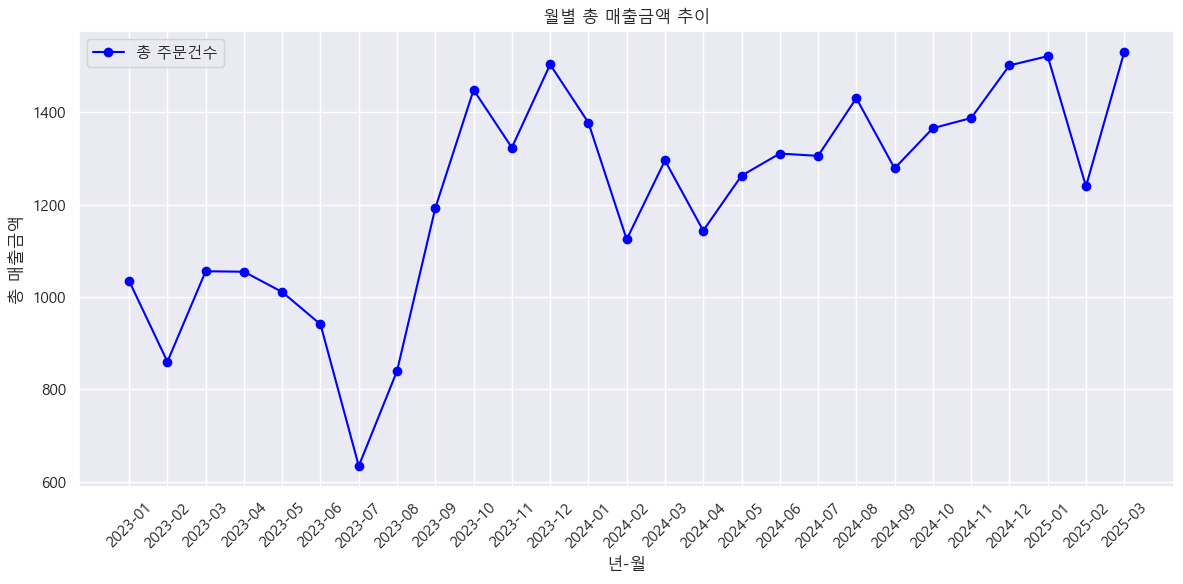

In [207]:

# 월별 총 매출금액 합계 구하기
월별_주문건수 = 피나치공_df.groupby('년월')['총 주문건수'].sum().reset_index()

import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(월별_주문건수['년월'], 월별_주문건수['총 주문건수'], marker='o', color='blue', label='총 주문건수')

plt.title('월별 총 매출금액 추이')
plt.xlabel('년-월')
plt.ylabel('총 매출금액')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


In [208]:
피나치공_df.head()

,일시,총 매출금액,총 주문건수,년,월,일,평균기온(℃),평균풍속(m/s),강수량(mm),holiday,배달의민족,요기요,전화,기타,배민1,쿠팡이츠,년월
0,2023-01-01,1300700,48,2023,1,1,1.1,2.9,0.0,1.0,770,150.0,95,20,0.0,0.0,2023-01
1,2023-01-03,865000,29,2023,1,3,-0.8,4.4,0.0,0.0,770,150.0,95,20,0.0,0.0,2023-01
2,2023-01-04,892600,34,2023,1,4,-0.4,2.4,0.0,0.0,770,150.0,95,20,0.0,0.0,2023-01
3,2023-01-05,975400,35,2023,1,5,0.2,0.9,0.0,0.0,770,150.0,95,20,0.0,0.0,2023-01
4,2023-01-06,1149200,40,2023,1,6,1.8,1.1,1.7,0.0,770,150.0,95,20,0.0,0.0,2023-01


    avg_order_count     avg_sales
요일                               
0         38.509091  1.216722e+06
1         46.578947  1.484689e+06
2         40.366972  1.331753e+06
3         36.013514  1.173734e+06
4         46.549550  1.449717e+06
5         55.500000  1.674577e+06
6         61.228070  1.819054e+06


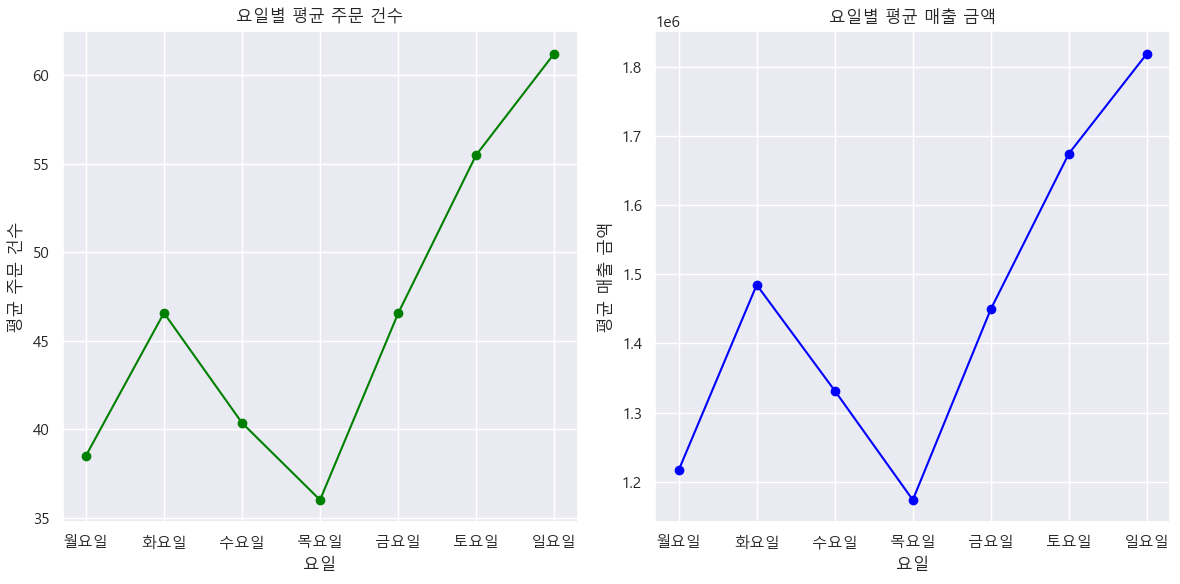

In [209]:
import matplotlib.pyplot as plt
import pandas as pd

# '일시'를 날짜 형식으로 변환
피나치공_df['일시'] = pd.to_datetime(피나치공_df['일시'])

# 요일 추출 (0=월요일, 1=화요일, ..., 6=일요일)
피나치공_df['요일'] = 피나치공_df['일시'].dt.weekday

filtered_df = 피나치공_df[(피나치공_df['총 주문건수'] > 5)]  # 주문건수가 5 이상인 날짜만 포함

# 각 요일별로 평균 주문건수와 매출을 계산
daily_avg_sales = filtered_df.groupby('요일').agg(
    avg_order_count=('총 주문건수', 'mean'),
    avg_sales=('총 매출금액', 'mean')
)

# 결과 출력
print(daily_avg_sales)

# 시각화
plt.figure(figsize=(12, 6))

# 평균 주문 건수 시각화
plt.subplot(1, 2, 1)
plt.plot(daily_avg_sales.index, daily_avg_sales['avg_order_count'], label='평균 주문 건수', color='green', marker='o')
plt.xlabel('요일')
plt.ylabel('평균 주문 건수')
plt.title('요일별 평균 주문 건수')
plt.xticks([0, 1, 2, 3, 4, 5, 6], ['월요일', '화요일', '수요일', '목요일', '금요일', '토요일', '일요일'])
plt.grid(True)

# 평균 매출 시각화
plt.subplot(1, 2, 2)
plt.plot(daily_avg_sales.index, daily_avg_sales['avg_sales'], label='평균 매출 금액', color='blue', marker='o')
plt.xlabel('요일')
plt.ylabel('평균 매출 금액')
plt.title('요일별 평균 매출 금액')
plt.xticks([0, 1, 2, 3, 4, 5, 6], ['월요일', '화요일', '수요일', '목요일', '금요일', '토요일', '일요일'])
plt.grid(True)

plt.tight_layout()
plt.show()

### 매출이 가장 적은 월,목요일 휴일정하기

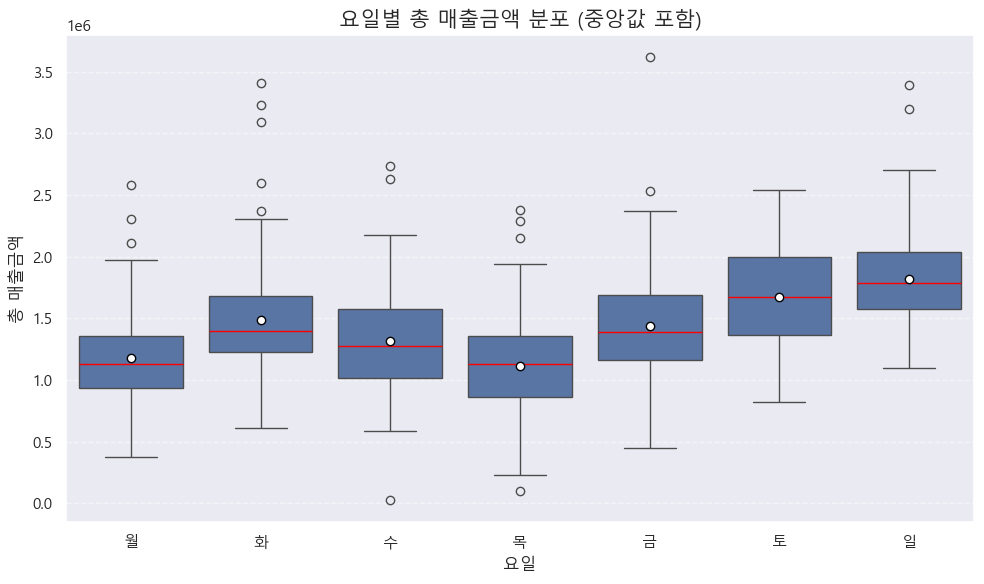

In [211]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 요일 숫자 → 한글 요일 이름으로 매핑 (옵션)
요일_이름 = {0: '월', 1: '화', 2: '수', 3: '목', 4: '금', 5: '토', 6: '일'}
피나치공_df['요일명'] = 피나치공_df['요일'].map(요일_이름)

# 요일 순서 보장
요일순서 = ['월', '화', '수', '목', '금', '토', '일']
피나치공_df['요일명'] = pd.Categorical(피나치공_df['요일명'], categories=요일순서, ordered=True)

# 시각화
plt.figure(figsize=(10,6))
sns.boxplot(data=피나치공_df, x='요일명', y='총 매출금액', showmeans=True,
            meanprops={"marker":"o", "markerfacecolor":"white", "markeredgecolor":"black"},
            medianprops={"color": "red"})  # 중앙값 빨간 선

plt.title("요일별 총 매출금액 분포 (중앙값 포함)", fontsize=15)
plt.xlabel("요일")
plt.ylabel("총 매출금액")
plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


In [212]:
import scipy.stats as stats

# 월요일과 목요일에 대한 데이터 필터링
answer = 피나치공_df[(피나치공_df['요일'] == 0) & (피나치공_df["총 주문건수"] >= 5)]
answer1 = 피나치공_df[(피나치공_df['요일'] == 3) & (피나치공_df["총 주문건수"] >= 5)]

# 각각의 평균 주문 건수 계산
mean_monday = answer['총 주문건수'].mean()
mean_thursday = answer1['총 주문건수'].mean()

print(f"월요일 평균 주문 건수: {mean_monday}")
print(f"목요일 평균 주문 건수: {mean_thursday}")

# 독립 샘플 t-검정
t_stat, p_value = stats.ttest_ind(answer['총 주문건수'], answer1['총 주문건수'])

# 결과 출력
print(f"t-검정 통계량: {t_stat}")
print(f"p-값: {p_value}")

# p-값을 통해 결론 도출
if p_value < 0.05:
    print("귀무가설을 기각합니다. 즉, 월요일과 목요일의 평균 주문 건수에는 유의미한 차이가 있습니다.")
else:
    print("귀무가설을 채택합니다. 즉, 월요일과 목요일의 평균 주문 건수에는 유의미한 차이가 없습니다.")


월요일 평균 주문 건수: 38.50909090909091
목요일 평균 주문 건수: 36.013513513513516
t-검정 통계량: 1.1440892410273
p-값: 0.2547384226593947
귀무가설을 채택합니다. 즉, 월요일과 목요일의 평균 주문 건수에는 유의미한 차이가 없습니다.


In [215]:
import scipy.stats as stats

# 월요일과 목요일에 대한 데이터 필터링
answer = 피나치공_df[(피나치공_df['요일'] == 0) & (피나치공_df["총 주문건수"] >= 5)]
answer1 = 피나치공_df[(피나치공_df['요일'] == 6) & (피나치공_df["총 주문건수"] >= 5)]

# 각각의 평균 주문 건수 계산
mean_monday = answer['총 주문건수'].mean()
mean_thursday = answer1['총 주문건수'].mean()

print(f"월요일 평균 주문 건수: {mean_monday}")
print(f"일요일 평균 주문 건수: {mean_thursday}")

# 독립 샘플 t-검정
t_stat, p_value = stats.ttest_ind(answer['총 주문건수'], answer1['총 주문건수'])

# 결과 출력
print(f"t-검정 통계량: {t_stat}")
print(f"p-값: {p_value}")

# p-값을 통해 결론 도출
if p_value < 0.05:
    print("귀무가설을 기각합니다. 즉, 월요일과 월요일의 평균 주문 건수에는 유의미한 차이가 있습니다.")
else:
    print("귀무가설을 채택합니다. 즉, 월요일과 일요일의 평균 주문 건수에는 유의미한 차이가 없습니다.")


월요일 평균 주문 건수: 38.50909090909091
일요일 평균 주문 건수: 61.228070175438596
t-검정 통계량: -10.701633854518702
p-값: 1.1059415825288539e-20
귀무가설을 기각합니다. 즉, 월요일과 월요일의 평균 주문 건수에는 유의미한 차이가 있습니다.


### 상관분석

In [216]:
correlation_matrix = 피나치공_df.select_dtypes(include=['number']).corr()
correlation_matrix

,총 매출금액,총 주문건수,년,월,일,평균기온(℃),평균풍속(m/s),강수량(mm),holiday,배달의민족,요기요,전화,기타,배민1,쿠팡이츠,요일
총 매출금액,1.000000,0.903428,0.286104,0.218695,0.062491,-0.137941,0.081211,-0.019724,0.066785,-0.139525,0.113418,0.256141,0.388623,0.281779,0.362175,0.345268
총 주문건수,0.903428,1.000000,0.246032,0.173682,0.043005,-0.104272,0.067860,-0.004244,0.088078,-0.081495,0.135844,0.239840,0.312241,0.257341,0.289249,0.439389
년,0.286104,0.246032,1.000000,-0.274787,-0.000402,-0.227124,0.094323,-0.067685,-0.004430,-0.762898,-0.006682,0.739020,0.524481,0.749134,0.782740,-0.010440
월,0.218695,0.173682,-0.274787,1.000000,0.007894,0.339532,-0.176140,0.036599,0.008896,0.092003,0.012903,-0.116400,0.523597,-0.006346,0.192358,-0.012272
일,0.062491,0.043005,-0.000402,0.007894,1.000000,0.002778,0.030282,0.002597,-0.124977,0.022069,-0.005152,0.011046,0.009102,0.005085,0.009054,-0.014202
평균기온(℃),-0.137941,-0.104272,-0.227124,0.339532,0.002778,1.000000,-0.463588,0.221554,-0.024559,-0.061294,-0.301898,-0.216034,-0.091734,-0.079144,-0.052110,0.003899
평균풍속(m/s),0.081211,0.067860,0.094323,-0.176140,0.030282,-0.463588,1.000000,-0.057541,-0.051658,0.007017,0.021332,0.136153,0.028846,-0.006247,0.014762,0.000644
강수량(mm),-0.019724,-0.004244,-0.067685,0.036599,0.002597,0.221554,-0.057541,1.000000,0.140458,-0.051542,-0.109728,-0.091981,-0.086862,-0.054861,-0.050280,0.004904
holiday,0.066785,0.088078,-0.004430,0.008896,-0.124977,-0.024559,-0.051658,0.140458,1.000000,0.006353,0.003400,-0.004657,0.033104,-0.010159,0.006949,-0.057458
배달의민족,-0.139525,-0.081495,-0.762898,0.092003,0.022069,-0.061294,0.007017,-0.051542,0.006353,1.000000,0.428085,-0.444450,-0.512569,-0.480961,-0.775856,-0.036458


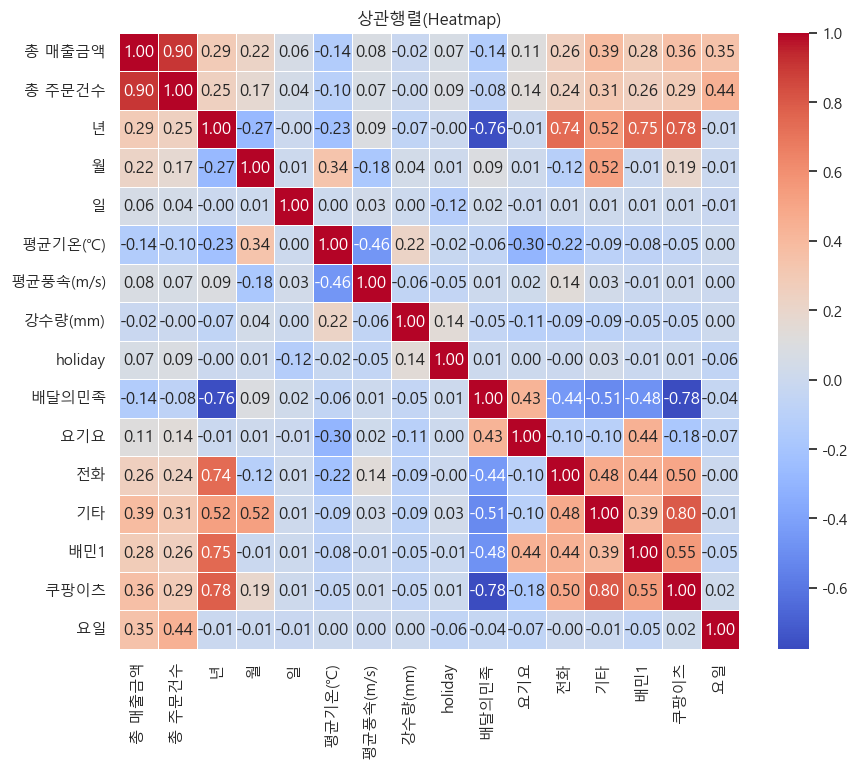

In [217]:
import seaborn as sns
import matplotlib.pyplot as plt

# 상관계수 행렬 계산
correlation_matrix = 피나치공_df.select_dtypes(include=['number']).corr()

# 히트맵 시각화
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('상관행렬(Heatmap)')
plt.show()


### 배달 주문 경로 추세

In [228]:
피나치공_df1.head()

,일시_x,총 매출금액,총 주문건수,년,월,일,평균기온(℃),평균풍속(m/s),강수량(mm),holiday,배달의민족,요기요,전화,기타,배민1,쿠팡이츠
623,2025-01-01,2175200,72,2025,1,1,1.0,2.3,0.0,1.0,441,179.0,136,51,235.0,480.0
624,2025-01-03,1639100,41,2025,1,3,0.1,2.9,0.0,0.0,441,179.0,136,51,235.0,480.0
625,2025-01-04,2228700,67,2025,1,4,0.3,2.3,0.0,0.0,441,179.0,136,51,235.0,480.0
626,2025-01-05,1962800,67,2025,1,5,-0.7,0.4,0.5,0.0,441,179.0,136,51,235.0,480.0
627,2025-01-07,2066400,61,2025,1,7,-1.7,2.6,1.9,0.0,441,179.0,136,51,235.0,480.0


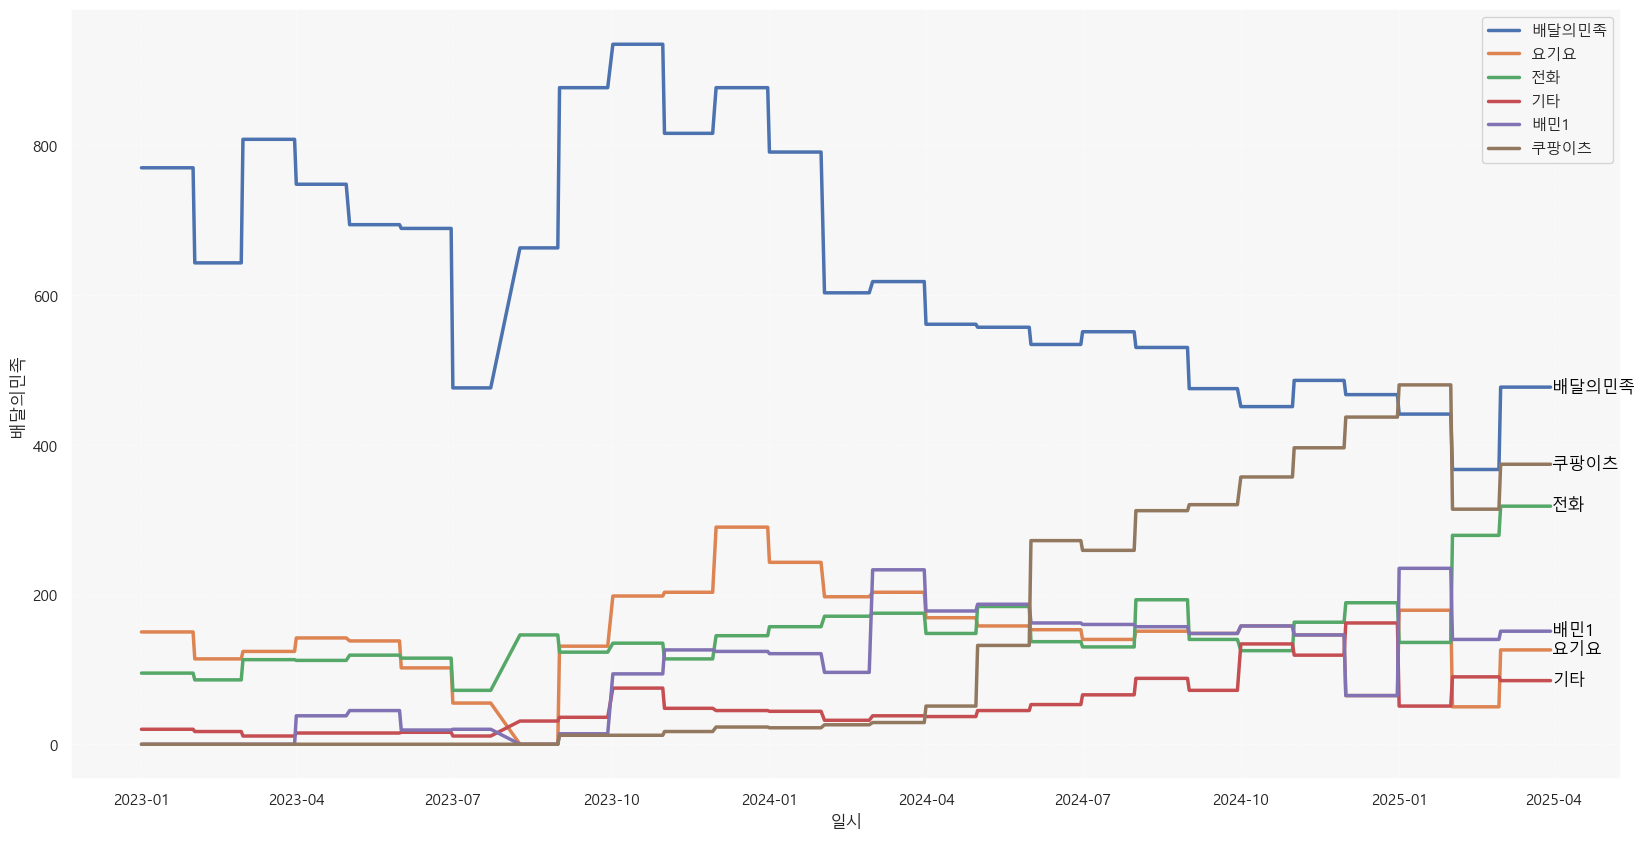

In [245]:
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import timedelta

labels = ["배달의민족", "요기요", "전화", "기타", "배민1", "쿠팡이츠"]
fig = plt.figure(figsize=(20, 10))
plt.rcParams['axes.facecolor'] = '#f7f7f7'  # 연한 회색 배경

for label in labels:
    sns.lineplot(data=피나치공_df, x='일시', y=label, label=label, linewidth=2.5)

    # 라벨 텍스트 선 끝에 붙이기
    last_x = 피나치공_df['일시'].iloc[-1] + timedelta(days=1)
    last_y = 피나치공_df[label].iloc[-1]
    plt.text(last_x, last_y, label, fontsize=12, color='black', va='center')

# 격자 추가
plt.grid(True, linestyle='--', linewidth=0.7, alpha=0.5)
plt.legend()
plt.show()




C:\Users\USER\AppData\Local\Temp\ipykernel_19808\4053544659.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=melted_df, x='배달수단', y='주문건수', palette='Set2')


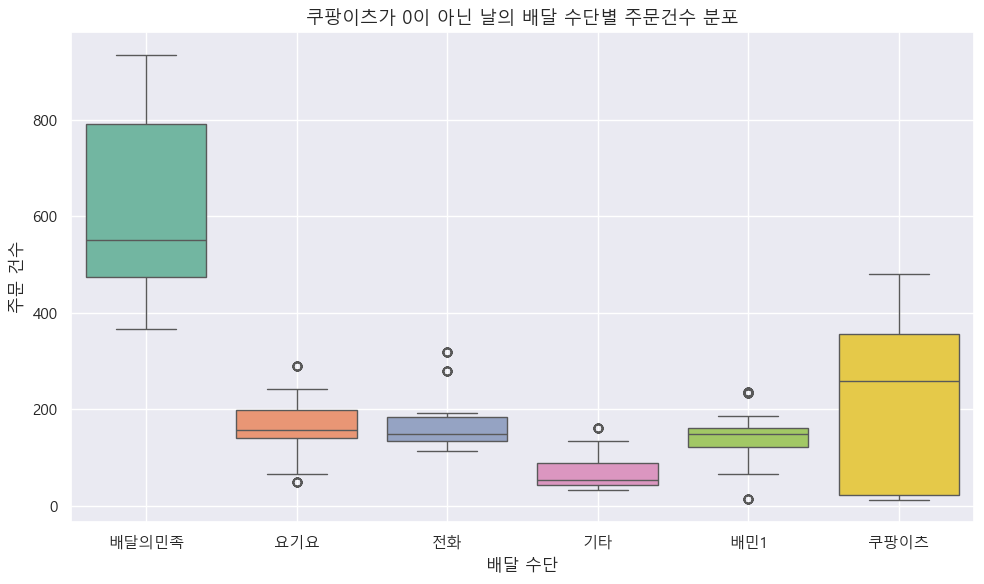

In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 사용할 컬럼
cols = ['배달의민족', '요기요', '전화', '기타', '배민1', '쿠팡이츠']

df["년월"] = pd.to_datetime(df["년월"], format="%Y-%m")
filtered_df = df[(df['쿠팡이츠'] != 0) & (df["년월"] >= "2023-09-01")][cols]

# seaborn용 long-form 형태로 변환
melted_df = filtered_df.melt(var_name='배달수단', value_name='주문건수')

# boxplot 그리기
plt.figure(figsize=(10, 6))
sns.boxplot(data=melted_df, x='배달수단', y='주문건수', palette='Set2')
plt.title('쿠팡이츠가 0이 아닌 날의 배달 수단별 주문건수 분포', fontsize=13)
plt.xlabel('배달 수단')
plt.ylabel('주문 건수')
plt.grid(True)
plt.tight_layout()
plt.show()
